In [101]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [104]:
#date_1 = datetime.datetime.now()
date_1 = datetime.datetime(2018, 3, 10, 17, 9, 37, 382505)
print("date_1", date_1)
print("date_1 repr", date_1.__repr__())
print(type(date_1))
date_2 = datetime.date.today()
date_2 = datetime.date(2018, 3, 10)
print(date_2)
print(date_2.__repr__())
print(type(date_2))

date_1 2018-03-10 17:09:37.382505
date_1 repr datetime.datetime(2018, 3, 10, 17, 9, 37, 382505)
<class 'datetime.datetime'>
2018-03-10
datetime.date(2018, 3, 10)
<class 'datetime.date'>


#### from datetime.date and datetime.datetime to pandas Timestamp

In [105]:
print(pd.Timestamp(date_1))
print(pd.to_datetime(date_1))

2018-03-10 17:09:37.382505
2018-03-10 17:09:37.382505


In [106]:
date_3 = pd.Timestamp(1993, 6, 7, 15, 16, 0)
print(date_3)
date_3

1993-06-07 15:16:00


Timestamp('1993-06-07 15:16:00')

### .normalize

Normalizing in the context of datetimes means stripping all of the time in- formation and just leaving the date bits attached to the object. If everything is in a Timestamp this is trivial:

In [107]:
print(date_1)
date_1 = pd.Timestamp(date_1)
print(date_1)
print(date_1.normalize())

2018-03-10 17:09:37.382505
2018-03-10 17:09:37.382505
2018-03-10 00:00:00


### Horizon

https://en.wikipedia.org/wiki/ISO_8601

In [124]:
t_ = datetime.datetime(2018, 3, 10, 17, 9, 37, 382505)
TODAY = pd.Timestamp(t_).normalize()
print(TODAY)
print('timedelta:', datetime.timedelta(days=365))
END = TODAY + datetime.timedelta(days=365)
print(END)

2018-03-10 00:00:00
timedelta: 365 days, 0:00:00
2019-03-10 00:00:00


In [132]:
# TODAY = pd.Timestamp('2018-06-01').normalize()
END = pd.Timestamp('2018-09-07').normalize()
print("TODAY:", TODAY)
print("END:", END)

TODAY: 2018-03-10 00:00:00
END: 2018-09-07 00:00:00


In [133]:
calendar = pd.DataFrame(index=pd.date_range(start=TODAY, end=END))
print(calendar.head(10))

Empty DataFrame
Columns: []
Index: [2018-03-10 00:00:00, 2018-03-11 00:00:00, 2018-03-12 00:00:00, 2018-03-13 00:00:00, 2018-03-14 00:00:00, 2018-03-15 00:00:00, 2018-03-16 00:00:00, 2018-03-17 00:00:00, 2018-03-18 00:00:00, 2018-03-19 00:00:00]


### Flows

In [134]:
print('Semi-month End:')
sm = pd.date_range(start=TODAY, end=END, freq='SM')
print('sm:',sm)
print('\n')
print('Month Start:')
ms = pd.date_range(start=TODAY, end=END, freq='MS')
print(ms)

Semi-month End:
sm: DatetimeIndex(['2018-03-15', '2018-03-31', '2018-04-15', '2018-04-30',
               '2018-05-15', '2018-05-31', '2018-06-15', '2018-06-30',
               '2018-07-15', '2018-07-31', '2018-08-15', '2018-08-31'],
              dtype='datetime64[ns]', freq='SM-15')


Month Start:
DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', freq='MS')


In [135]:
income = pd.DataFrame(
    data={'income': 1000},
    index=pd.date_range(start=TODAY, end=END, freq='SM'))
print(income.head())

            income
2018-03-15    1000
2018-03-31    1000
2018-04-15    1000
2018-04-30    1000
2018-05-15    1000


In [136]:
rent = pd.DataFrame(
    data={'rent': -1500},
    index=pd.date_range(start=TODAY, end=END, freq='MS')
)
print(rent.head())

            rent
2018-04-01 -1500
2018-05-01 -1500
2018-06-01 -1500
2018-07-01 -1500
2018-08-01 -1500


In [137]:
#concat to flows rent and income
calendar = pd.concat([calendar, income], axis=1).fillna(0)
calendar = pd.concat([calendar, rent], axis=1).fillna(0)


In [149]:
calendar.head(6)

,income,rent
2018-03-10,0.0,0.0
2018-03-11,0.0,0.0
2018-03-12,0.0,0.0
2018-03-13,0.0,0.0
2018-03-14,0.0,0.0
2018-03-15,1000.0,0.0


In [154]:
calendar.loc[
    (calendar.index >= '2018-03-30') &
    (calendar.index <= '2018-04-02')
]

,income,rent
2018-03-30,0.0,0.0
2018-03-31,1000.0,0.0
2018-04-01,0.0,-1500.0
2018-04-02,0.0,0.0


In [155]:
calendar['total'] = calendar.sum(axis=1)
calendar['cum_total'] = calendar['total'].cumsum()

In [157]:
calendar.tail()

,income,rent,total,cum_total
2018-09-03,0.0,0.0,0.0,3000.0
2018-09-04,0.0,0.0,0.0,3000.0
2018-09-05,0.0,0.0,0.0,3000.0
2018-09-06,0.0,0.0,0.0,3000.0
2018-09-07,0.0,0.0,0.0,3000.0


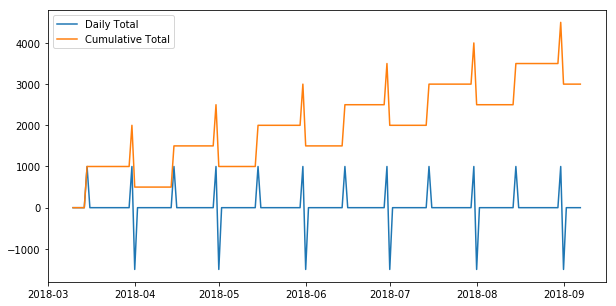

In [158]:
plt.figure(figsize=(10, 5))
plt.plot(calendar.index, calendar.total, label='Daily Total')
plt.plot(calendar.index, calendar.cum_total, label='Cumulative Total')
plt.legend()

In [160]:
bank = pd.DataFrame(
    data={ 'bank': 2000},
    index=pd.date_range(start=TODAY, end=TODAY)
)

print(bank)

            bank
2018-03-10  2000


In [161]:
calendar = pd.concat([calendar, bank], axis=1).fillna(0)

In [162]:
calendar.sum(axis=1).tail(11)

2018-08-28    3500.0
2018-08-29    3500.0
2018-08-30    3500.0
2018-08-31    6500.0
2018-09-01       0.0
2018-09-02    3000.0
2018-09-03    3000.0
2018-09-04    3000.0
2018-09-05    3000.0
2018-09-06    3000.0
2018-09-07    3000.0
Freq: D, dtype: float64

In [164]:
def update_totals(df):
    if 'total' and 'cum_total' in calendar:
        df['total'] = 0
        df['cum_total'] = 0
    df['total'] = df.sum(axis=1)
    df['cum_total'] = df['total'].cumsum()
    return df

In [166]:
calendar = update_totals(calendar)

In [167]:
def plot_budget(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df.total, label='Daily Total')
    plt.plot(df.index, df.cum_total, label='Cumulative Total')
    plt.legend()


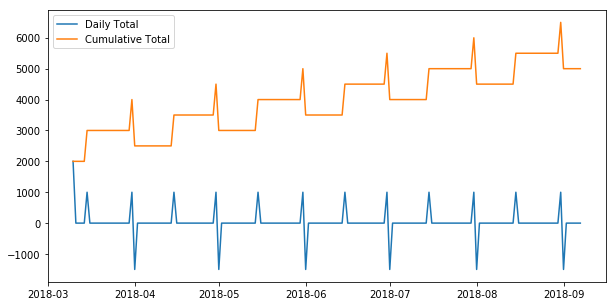

In [168]:
plot_budget(calendar)

In [169]:
vacation = pd.DataFrame(
    data={'vacation': -2500},
    index=[pd.Timestamp('2018-05-01').normalize()]
)
print(vacation)

            vacation
2018-05-01     -2500


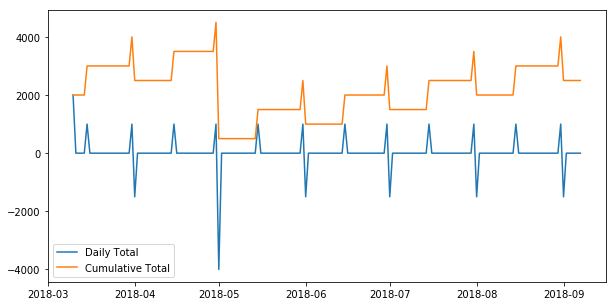

In [170]:
calendar = pd.concat([calendar, vacation], axis=1).fillna(0)
calendar = update_totals(calendar)
plot_budget(calendar)

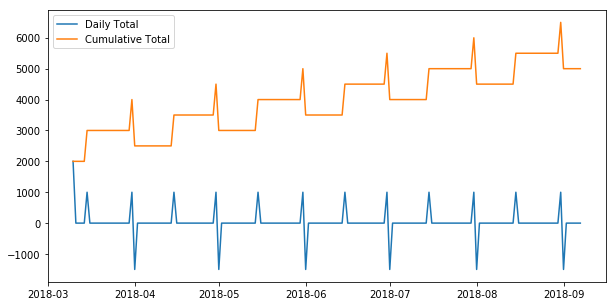

In [174]:
# calendar.drop('vacation', axis=1)
calendar = update_totals(calendar)
plot_budget(calendar)